In [2]:
import numpy as np
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [9]:
X_train.shape

(55000, 784)

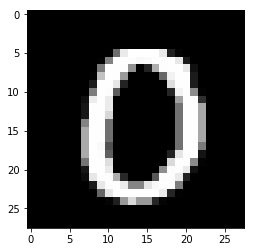

In [19]:
from PIL import Image

plt.imshow(X_train[10].reshape((28, 28)), cmap='Greys_r')

In [25]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [26]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [27]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [28]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [30]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [31]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [32]:
init = tf.global_variables_initializer()

In [33]:
saver = tf.train.Saver()

In [36]:
n_epochs = 40
batch_size = 50

In [37]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.84 Val accuracy: 0.9118
1 Train accuracy: 0.96 Val accuracy: 0.9312
2 Train accuracy: 0.94 Val accuracy: 0.9414
3 Train accuracy: 0.92 Val accuracy: 0.9474
4 Train accuracy: 0.9 Val accuracy: 0.95
5 Train accuracy: 0.96 Val accuracy: 0.956
6 Train accuracy: 0.96 Val accuracy: 0.9586
7 Train accuracy: 0.96 Val accuracy: 0.962
8 Train accuracy: 0.96 Val accuracy: 0.9628
9 Train accuracy: 0.96 Val accuracy: 0.9654
10 Train accuracy: 0.96 Val accuracy: 0.9666
11 Train accuracy: 0.98 Val accuracy: 0.9698
12 Train accuracy: 0.94 Val accuracy: 0.9698
13 Train accuracy: 0.92 Val accuracy: 0.9696
14 Train accuracy: 1.0 Val accuracy: 0.971
15 Train accuracy: 0.98 Val accuracy: 0.9728
16 Train accuracy: 1.0 Val accuracy: 0.9716
17 Train accuracy: 1.0 Val accuracy: 0.9728
18 Train accuracy: 1.0 Val accuracy: 0.9728
19 Train accuracy: 0.94 Val accuracy: 0.9744
20 Train accuracy: 0.98 Val accuracy: 0.9726
21 Train accuracy: 1.0 Val accuracy: 0.9738
22 Train accuracy: 1.0 Val accu

In [38]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:10]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [39]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:10])

Predicted classes: [7 2 1 0 4 1 4 9 6 9]
Actual classes:    [7 2 1 0 4 1 4 9 5 9]


In [40]:
from keras.preprocessing import image 
from keras.applications.vgg16 import preprocess_input 
import numpy as np
import matplotlib.pyplot as plt
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    temp_img=image.load_img("/home/anirban/Downloads/digit2.png",grayscale=True,target_size=(28,28)) 
    temp_img=image.img_to_array(temp_img)
    print(temp_img.shape)
    temp_img = temp_img.reshape((1, 28 * 28)) 
    temp_img = temp_img.astype('float32') / 255
    Z = logits.eval(feed_dict={X: temp_img})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
(28, 28, 1)


In [41]:
print("Predicted classes:", y_pred)

Predicted classes: [2]
